In [1]:
# Instalar paquetes necesarios:
# !pip install pandas
# !pip install numpy
# !pip install ipykernel
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly_express 
# !pip install ipywidgets
#%pip install pandas
#%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly_express as px 
import datetime
import warnings
# Se importa la librería de KaggleHub para descargar datasets para la práctica
# Se debe instalar la librería con el comando: pip install kagglehub
import kagglehub


c:\Users\Nasht\Proyectos Python\Ejercicio 3\Trabajo3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Se establecio el path de la carpeta donde se descargan los datasets de KaggleHub la ultima version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

# El Dataset a usar es el 'Sample - Superstore.csv'
archivo = path + '\\' + 'Sample - Superstore.csv'

100%|██████████| 550k/550k [00:00<00:00, 2.89MB/s]


Extracting files...


In [3]:
# Para evitar que se muestren advertencias innecesarias en la salida usaremos warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

In [4]:
# Cargar el dataset a la variable df que sera nuestro DataFrame.
df=pd.read_csv(archivo,encoding='latin1')

In [5]:
# Se revisa la información del tipo de datos del DataFrame, para poder determinar que se debe hacer con cada columna.
# Por ejemplo, si una columna es de tipo object, se puede convertir a tipo datetime si contiene fechas.
# Si una columna es de tipo int o float, se puede usar para cálculos numéricos.
# Si una columna es de tipo category, se puede usar para agrupar datos.     
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
# Convertimos la fecha de pedido a formato datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [8]:
# Año más reciente en el dataset
anio_max = df["Order Date"].dt.year.max()

# Filtramos desde ese año menos 4
df_5y = df[df["Order Date"].dt.year >= anio_max - 4]

In [9]:
#Agrupamos por segmento de cliente
segmento_agg = (
    df_5y.groupby("Segment")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

# Calculamos el margen de beneficio
segmento_agg["Profit_Margin (%)"] = (
    segmento_agg["Profit"] / segmento_agg["Sales"]
) * 1


segmento_agg = (
    df_5y.groupby("Segment")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

# Calculamos el margen de beneficio
segmento_agg["Profit_Margin (%)"] = (
    segmento_agg["Profit"] / segmento_agg["Sales"]
) * 100

print(segmento_agg.sort_values("Sales", ascending=False))

       Segment         Sales       Profit  Profit_Margin (%)
0     Consumer  1.161401e+06  134119.2092          11.548050
1    Corporate  7.061464e+05   91979.1340          13.025506
2  Home Office  4.296531e+05   60298.6785          14.034269


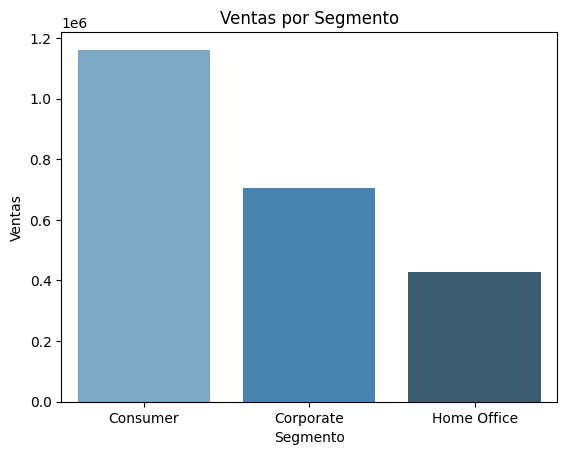

In [10]:
sns.barplot(data=segmento_agg, x="Segment", y="Sales", palette="Blues_d")
plt.title("Ventas por Segmento")
plt.ylabel("Ventas")
plt.xlabel("Segmento")
plt.show()